<div class="alert alert-block alert-success" style="text-align: center;">
    <h1 align="center">Tubes UAS Big Data ISKB381355</h1>
    <h3 align="center">Perbandingan kualitas dan popularitas aplikasi di Google Play Store: Berdasarkan rating, jumlah unduhan, tren, kategori, dan preferensi pengguna</h3>
</div>




<center>
  <img src = "http://res.heraldm.com/content/image/2021/02/21/20210221000044_0.jpg" width=40%>
</center>



<div>
    <h5>Kelompok 8 :</h5>
    <ul>
        <li>Alfi Atqia Rinjani (2201010280)</li>
        <li>Andrian (2201010289)</li>
        <li>Canggih Wahyu Rinaldi (2201010290)</li>
    </ul>
</div>



---



# **Pendahuluan:**

Disini kita menggunakan dataset playstore.csv yang berisi tentang bla bla bla

**Import library.**

In [441]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mount drive dan import dataset.**

In [442]:
# from google.colab import drive
# drive.mount('/content/drive')

In [443]:
# Import file csv dari drive

# dataset = '/content/drive/Colab Notebooks/big_data/googleplaystore.csv'
dataset = 'googleplaystore.csv'

ps_data = pd.read_csv(dataset)

In [444]:
# Mengecek 5 data teratas dalam dataset (head)
ps_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [445]:
# Mengecek 5 data terakhir dalam dataset (tail)
ps_data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [446]:
# Jumlah/shape dataset
ps_data.shape

(10841, 13)

In [447]:
# Atribut dalam dataset
ps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Adapun keterangan informasi yang terdapat dalam setiap kolom atribut dalam dataset ini :**

* `App`: Berisi nama aplikasi dengan deskripsi singkat (opsional).
* `Category`: kategori aplikasi.
* `Rating`: Berisi nilai rata-rata yang diberikan oleh pengguna untuk aplikasi tersebut.
* `Reviews`: Berisi jumlah pengguna yang memberikan ulasan untuk aplikasi tersebut.
* `Size`: Menyatakan ruang disk yang dibutuhkan untuk menginstal aplikasi tersebut/besar ukuran aplikasi.
* `Installs`: Berisi angka bulat untuk jumlah aplikasi tersebut diunduh.
* `Type`: Menyatakan apakah aplikasi tersebut gratis atau berbayar.
* `Price`: Berisi harga yang harus dibayar untuk menginstal aplikasi. Untuk aplikasi tipe gratis, harganya nol.
* `Content rating`: Menyatakan apakah aplikasi tersebut cocok untuk semua kelompok usia atau tidak.
* `Genres`: Menyatakan termasuk genre mana aplikasi tersebut.
* `Last updated`: Menyatakan tanggal update terakhir dirilis.
* `Current Ver`: Berisi versi terkini dari aplikasi tersebut.
* `Android Ver`: Berisi versi Android dari aplikasi tersebut.

# **Preprocessing dataset:**

**Data Duplikat.**

In [448]:
# Mengecek data-data duplikat dalam dataset.
ps_data.duplicated().sum()

483

In [449]:
# Drop duplikat value pada dataset.
ps_data= ps_data.drop_duplicates()

In [450]:
ps_data.duplicated().sum()

0

In [451]:
# Jumlah/shape dataset
ps_data.shape

(10358, 13)

**Data Missing value.**

In [452]:
# Cek data missing values
ps_data.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Disini kita harus menghitung persentase jumlah data missing value dalam dataset.

In [453]:
total_miss = sum([True for id,row in ps_data.iterrows() if any(row.isnull())])

persentase = round(total_miss/10358*100, 2)

print(f'Jadi, ada total {total_miss} ({persentase}%) baris data yang memiliki setidaknya 1 missing value.')

Jadi, ada total 1472 (14.21%) baris data yang memiliki setidaknya 1 missing value.


Sehingga, jika menghapus semua data missing maka bisa berpengaruh ke hasil analisanya. Jadi untuk atribut yang jumlah missing valuenya sedikit akan dihapus sedangkan missing value pada atribut `rating` akan kita sispkan data baru berdasarkan nilai mean/median per tiap kategori

In [454]:
ps_data = ps_data[ps_data['Type'].notna()]
ps_data = ps_data[ps_data['Content Rating'].notna()]
ps_data = ps_data[ps_data['Current Ver'].notna()]
ps_data = ps_data[ps_data['Android Ver'].notna()]

In [455]:
# Cek data missing values
ps_data.isnull().sum()

App                  0
Category             0
Rating            1460
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [456]:
# Mencari nilai mean dan median dalam atribut Rating dengan mengecualikan data missing valuenya.

nilai_mean = round(ps_data[~ps_data['Rating'].isnull()]['Rating'].mean(),1)

nilai_median = ps_data[~ps_data['Rating'].isnull()]['Rating'].median()

[nilai_mean, nilai_median]

[4.2, 4.3]

Visualisasi nilainya dengan boxplot and a distplot.

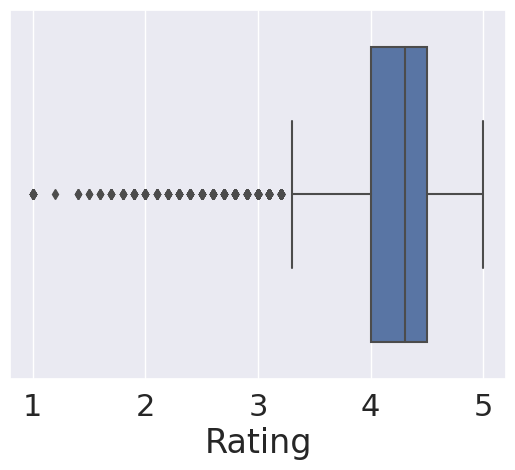

In [457]:
# Boxplot
sns.boxplot(data = ps_data['Rating'],x = ps_data['Rating']);

Text(0, 0.5, 'Jumlah')

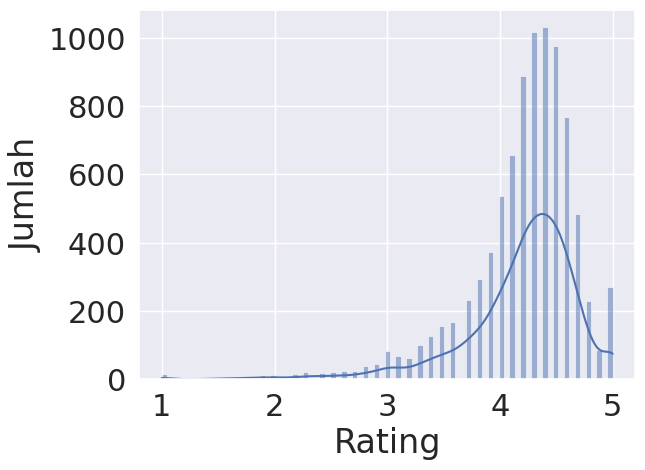

In [458]:
# Distplot
sns.histplot(ps_data['Rating'], kde=True)
plt.ylabel('Jumlah')

In [459]:
# Menambhkan nilai median ke dalam missing value'Rating'
ps_data['Rating'].fillna(value=nilai_median, inplace=True)

In [460]:
# Cek data missing values
ps_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Mengubah tipe data atribut `Price` dari string ke float.**





In [461]:
ps_data['Price'].value_counts()

0          9584
$0.99       144
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 92, dtype: int64

Untuk mengubah nilainya dari string menjadi float, pertama-tama kita harus menghilangkan simbol $ dari semua nilainya.

In [462]:
# Membuat fungsi drop-dollar
def drop_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [463]:
ps_data['Price'] = ps_data['Price'].apply(lambda x: drop_dollar(x))
ps_data['Price'].value_counts()

0.00      9584
0.99       144
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 92, dtype: int64

**Mengubah tipe data atribut `Installs` dari string ke integer.**

In [464]:
ps_data['Installs'].value_counts()

1,000,000+        1487
10,000,000+       1132
100,000+          1129
10,000+           1031
1,000+             888
100+               709
5,000,000+         683
500,000+           516
50,000+            473
5,000+             468
10+                384
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
Name: Installs, dtype: int64

Untuk mengubah nilainya dari string menjadi int, kita harus menghilangkan simbol + dan , dari semua nilainya seperti $ pada langkah sebelumnya.

In [465]:
def drop_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [466]:
ps_data['Installs'] = ps_data['Installs'].apply(lambda x: drop_plus(x))
ps_data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9802,File Ex - ES File Explorer,TOOLS,4.2,24,5.0M,1000,Free,0.0,Everyone,Tools,"December 27, 2017",1.1.6,4.2 and up


**Mengubah tipe data `Last Updated` ke datetime.**

In [467]:
from datetime import datetime
ps_data['Last Updated'] = ps_data['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


**Mengubah value kolom `Size` menjadi unit ukuran yang sama (MB).**

In [468]:
ps_data['Size'].value_counts()

Varies with device    1525
11M                    187
12M                    186
13M                    186
14M                    181
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

Kita dapat melihat bahwa nilai pada kolom `size` berisi data dengan satuan yang berbeda. 'M' adalah singkatan dari MB dan 'k' adalah singkatan dari KB. Untuk menganalisis kolom ini dengan mudah, kita perlu mengonversi semua nilai ke satu unit. Dalam hal ini, kita akan mengkonversi semua unit ke MB.

Seperti yang kita tahu bahwa 1MB = 1024KB, jadi untuk mengonversi KB ke MB, kita harus membagi semua nilai yang ada di KB dengan 1024

In [469]:
## Size - convert Mbs ke kbs
ps_data['Size'] = ps_data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
ps_data['Size'] = ps_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ps_data['Size'] = ps_data['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
ps_data['Size'] = ps_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)

In [470]:
ps_data['Size'] = ps_data['Size'].apply(lambda x: float(x))

In [471]:
def kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Menerapkan fungsi kb_to_mb untuk mengonversi nilai dalam kolom `size` menjadi satuan ukuran tunggal (MB) dan tipe data dari string menjadi float.

In [472]:
ps_data['Size'] = ps_data['Size'].apply(lambda x: kb_to_mb(x))
ps_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [473]:
ps_data['Size'].value_counts()

11.000000    187
12.000000    186
13.000000    186
14.000000    181
15.000000    174
            ... 
0.704102       1
0.419922       1
0.418945       1
0.195312       1
0.604492       1
Name: Size, Length: 455, dtype: int64

**Terakhir mengubah tipe data value atr `Reviews` dari string ke int.**

In [474]:
ps_data['Reviews'] = ps_data['Reviews'].astype(int)
ps_data.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3307,MyScript Calculator,TOOLS,4.5,342336,NaN,10000000,Free,0.0,Everyone,Tools;Education,2015-08-10,Varies with device,Varies with device


# **Visualisasi EDA:**

Setelah melakukan preprocessing. Sekarang kita dapat melakukan eksplorasi dan visualisasi data untuk mendapatkan beberapa insight dari dataset kita.

**1. Korelasi dan distribusi antar atribut**

In [475]:
# Mengetahui korelasi antara atribut-atribut dalam play store dataset
ps_data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063472,0.063941,0.044829,-0.019721
Reviews,0.063472,1.000000,0.237853,0.634987,-0.009424
Size,0.063941,0.237853,1.000000,0.168805,-0.023820
Installs,0.044829,0.634987,0.168805,1.000000,-0.011155
Price,-0.019721,-0.009424,-0.023820,-0.011155,1.000000


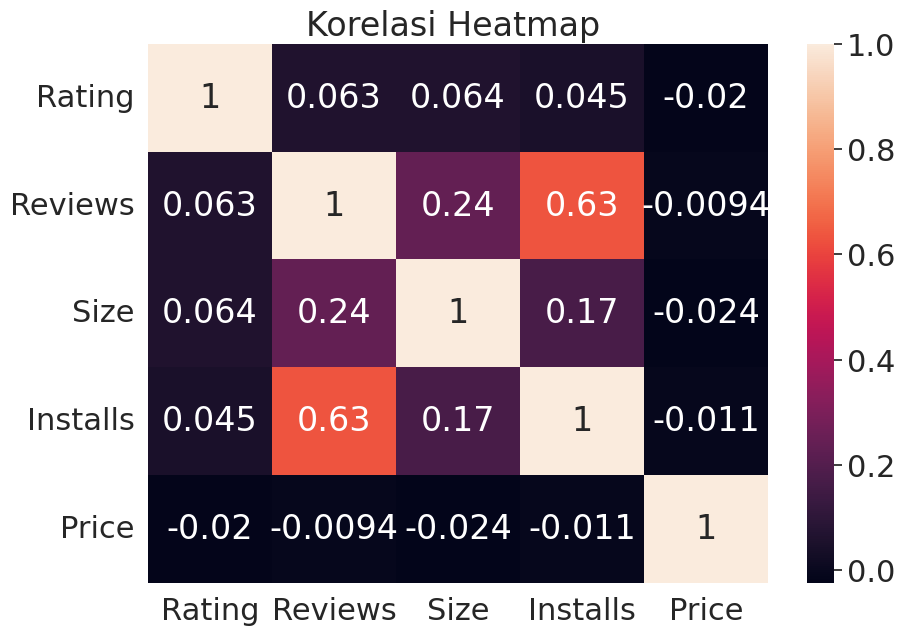

In [476]:
# Tampilan dengan Correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(ps_data.corr(), annot=True)
plt.title('Korelasi Heatmap ')
plt.show()


* Terdapat korelasi positif yang kuat antara kolom `Review` dan `Install`. Hal ini cukup jelas. Semakin tinggi jumlah Install, semakin tinggi pula basis pengguna, dan semakin tinggi pula jumlah ulasan yang diberikan oleh pengguna.
* `Harga` sedikit berkorelasi negatif dengan `Rating`, `Review`, dan `Install`. Ini berarti bahwa ketika harga aplikasi meningkat, peringkat rata-rata, jumlah total ulasan, dan Install akan turun sedikit.
* `Rating` sedikit berkorelasi positif dengan kolom `Installs` dan `Reviews`. Hal ini menunjukkan bahwa seiring dengan meningkatnya rating rata-rata pengguna, Install aplikasi dan jumlah ulasan juga meningkat.

Adapun Visualisasi distribusi atribut `Harga`, `Rating`, `Review`, dan `Install`

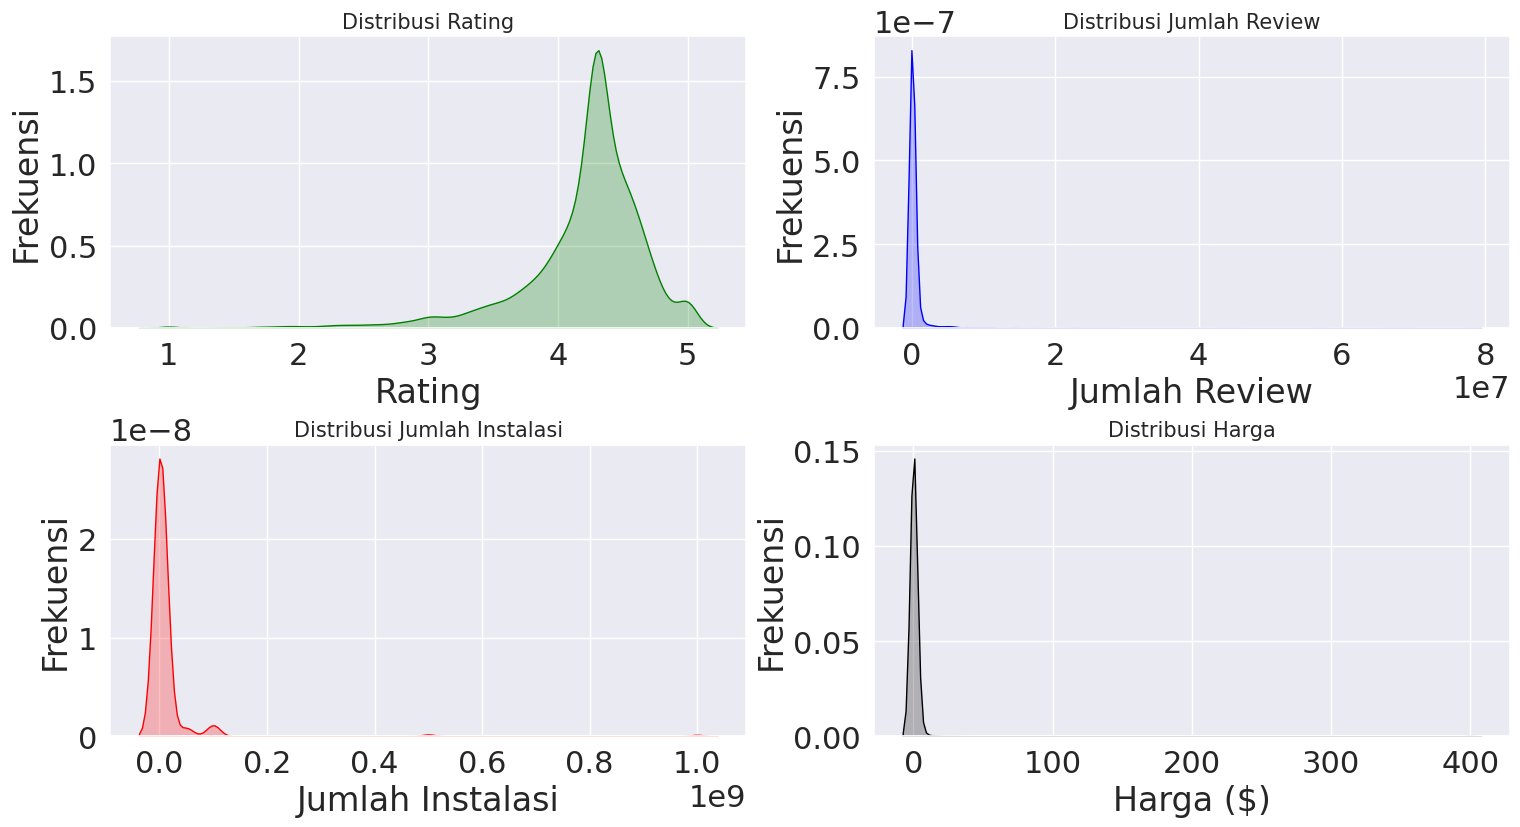

In [477]:
plt.figure(figsize=(20, 10))

# Plot 1: Distribusi Rating
plt.subplot(2, 2, 1)
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Rating"], color="green", fill=True)
plt.title('Distribusi Rating', size=15)

# Plot 2: Distribusi Jumlah Review
plt.subplot(2, 2, 2)
plt.xlabel("Jumlah Review")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Reviews"], color="blue", fill=True)
plt.title('Distribusi Jumlah Review', size=15)

# Plot 3: Distribusi Jumlah Instalasi
plt.subplot(2, 2, 3)
plt.xlabel("Jumlah Instalasi")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Installs"], color="red", fill=True)
plt.title('Distribusi Jumlah Instalasi', size=15)

# Plot 4: Distribusi Harga
plt.subplot(2, 2, 4)
plt.xlabel("Harga ($)")
plt.ylabel("Frekuensi")
sns.kdeplot(ps_data["Price"], color="black", fill=True)
plt.title('Distribusi Harga', size=15)

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
plt.show()


**2. Persentase jumlah tipe aplikasi berbayar dan gratis (`free` dan `paid`)**

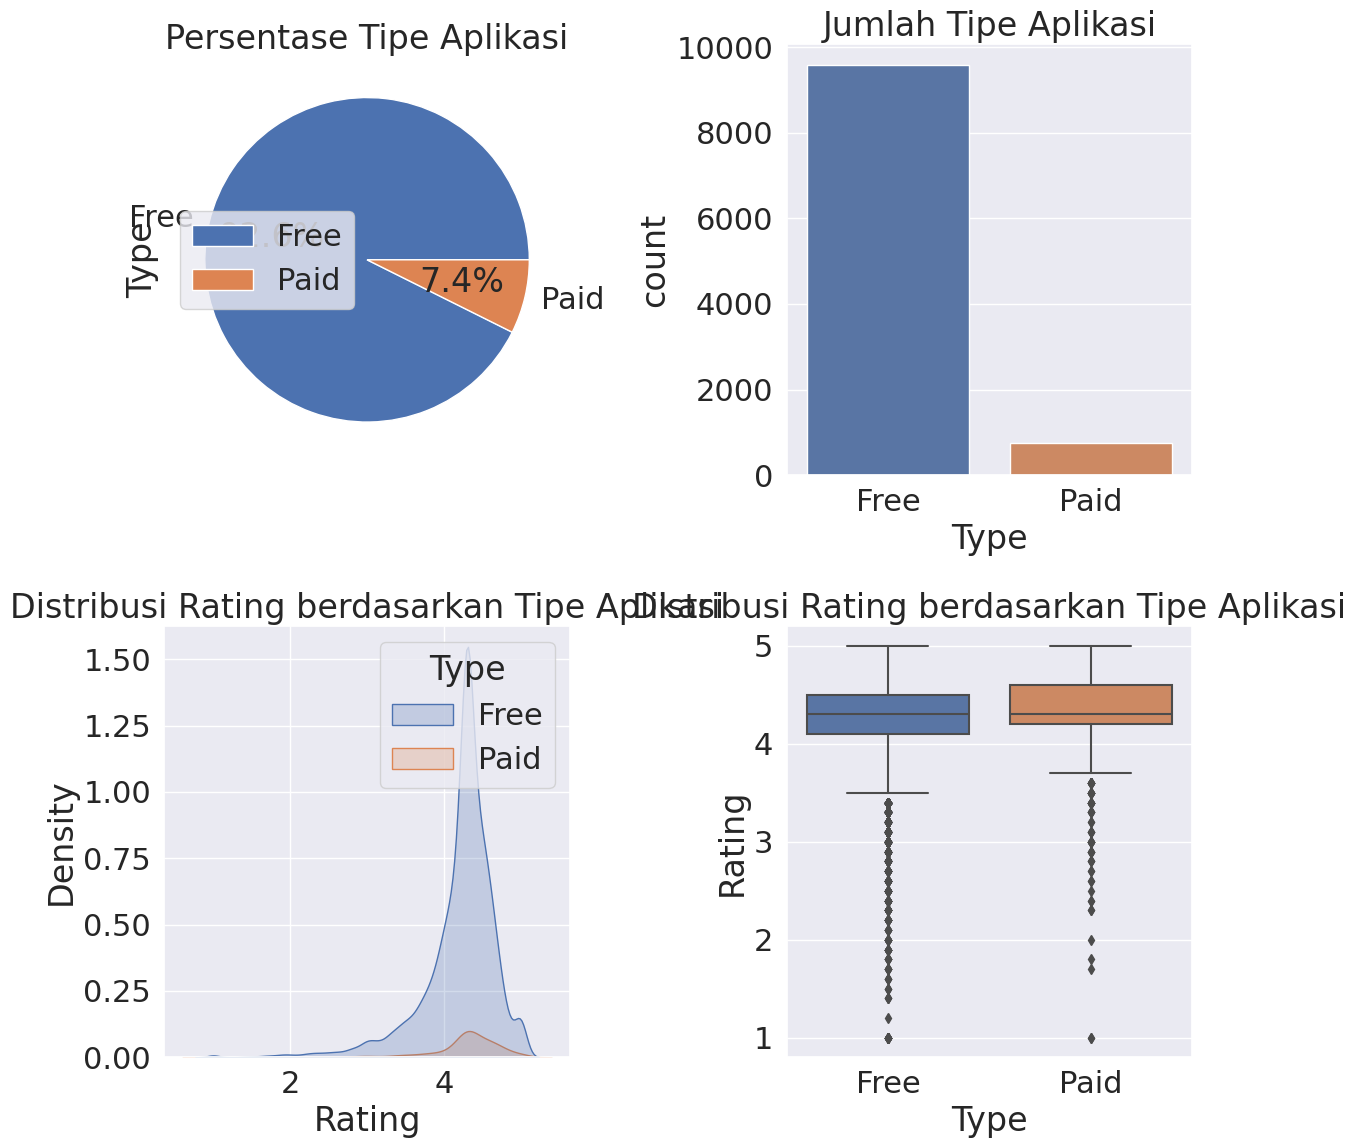

In [478]:
plt.figure(figsize=(12, 12))

# Plot 1 - Pie Chart: Persentase aplikasi gratis dan berbayar
plt.subplot(2, 2, 1)
ps_data['Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Persentase Tipe Aplikasi")
plt.legend()

# Plot 2 - Bar Plot: Jumlah Tipe Aplikasi
plt.subplot(2, 2, 2)
sns.countplot(data=ps_data, x='Type')
plt.title("Jumlah Tipe Aplikasi")


# Plot 3 - KDE Plot: Distribusi rating berdasarkan tipe aplikasi
plt.subplot(2, 2, 3)
sns.kdeplot(data=ps_data, x="Rating", hue='Type', fill=True)
plt.title("Distribusi Rating berdasarkan Tipe Aplikasi")

# Plot 4 - Box Plot: Distribusi rating berdasarkan tipe aplikasi
plt.subplot(2, 2, 4)
sns.boxplot(data=ps_data, x='Type', y='Rating')
plt.title("Distribusi Rating berdasarkan Tipe Aplikasi")

plt.tight_layout()
plt.show()

Disini bisa kita simpulkan bahwa kebanyakan app di play store itu gratis (92.6% free). Dan berbayar dan tidaknya aplikasi ternyata tidak terlalu mempengaruhi rating.

**3. Eksplorasi Content-rating (Batasan usia)**

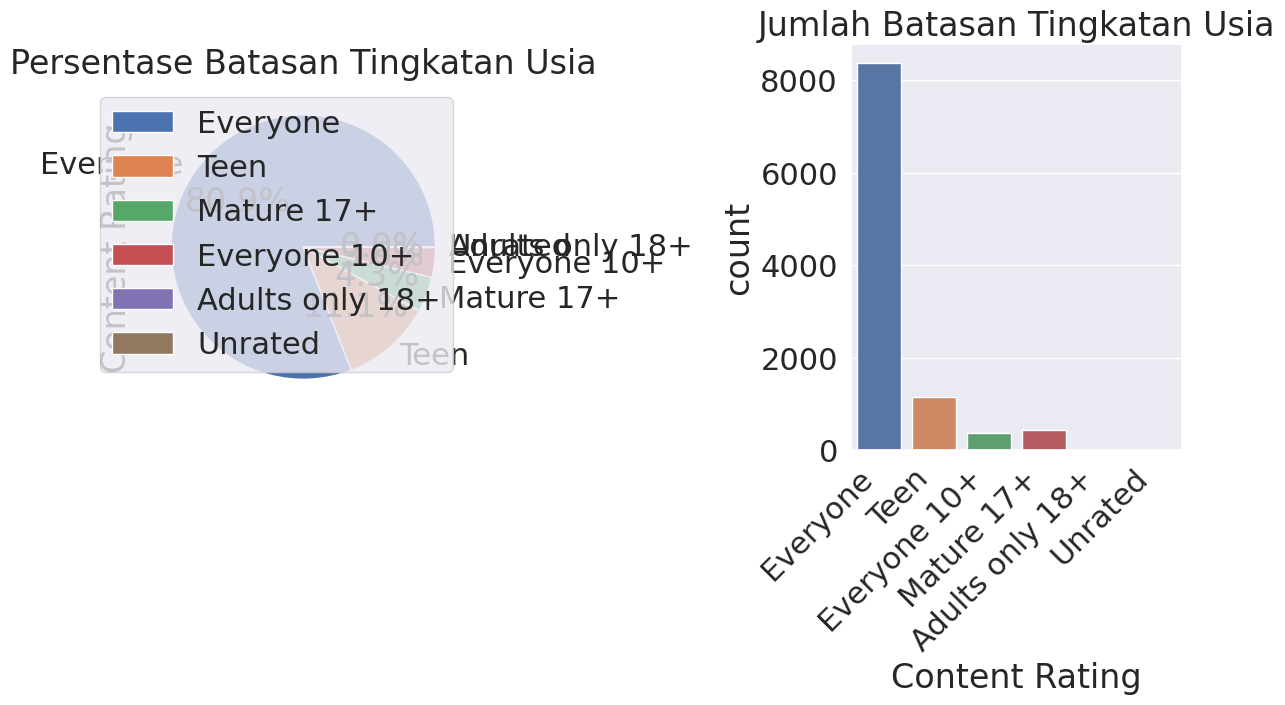

In [479]:
plt.figure(figsize=(12, 12))

# Plot 1 - Pie Chart: Persentase berdasarkan batasan tingkatan usia
plt.subplot(2, 2, 1)
ps_data['Content Rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Persentase Batasan Tingkatan Usia")
plt.legend()

# Plot 2 - Bar Plot: Jumlah Batasan Tingkatan Usia
plt.subplot(2, 2, 2)
sns.countplot(data=ps_data, x='Content Rating')
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
plt.title("Jumlah Batasan Tingkatan Usia")


plt.tight_layout()
plt.show()

Rata-rata app di play store bisa digunakan semua orang tanpa batasan usia (81.8%). Sisanya ada batasan usia tertentu untuk menggunakannya.

**4. Jumlah aplikasi ditiap kategori aplikasi.**

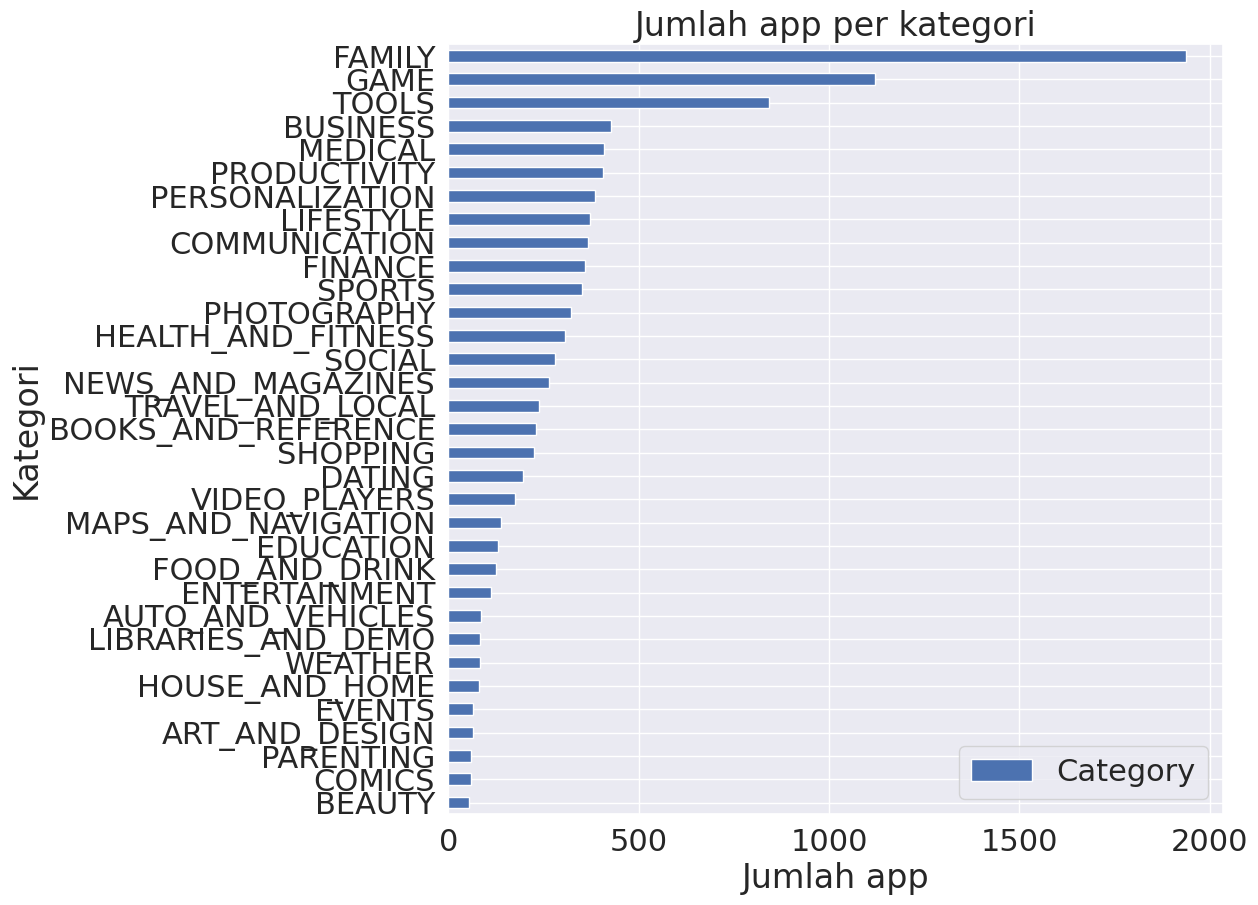

In [480]:
ps_data['Category'].value_counts().plot.barh(figsize=(10,10)).invert_yaxis()
plt.ylabel('Kategori')
plt.xlabel('Jumlah app')
plt.title('Jumlah app per kategori')
plt.legend()


Dari visualisasi ini kita bisa tau seberapa kompetitif kategori tertentu di play store. Kategori `Family`, `Game`, dan `Tools` memiliki jumlah aplikasi terbanyak dibandingkan dengan kategori lainnya.

**5. Kategori Populer berdasarkan app installs (Jumlah unduhan)**

Text(0.5, 1.0, 'Top 10 Kategori Populer berdasarkan Jumlah Unduhan')

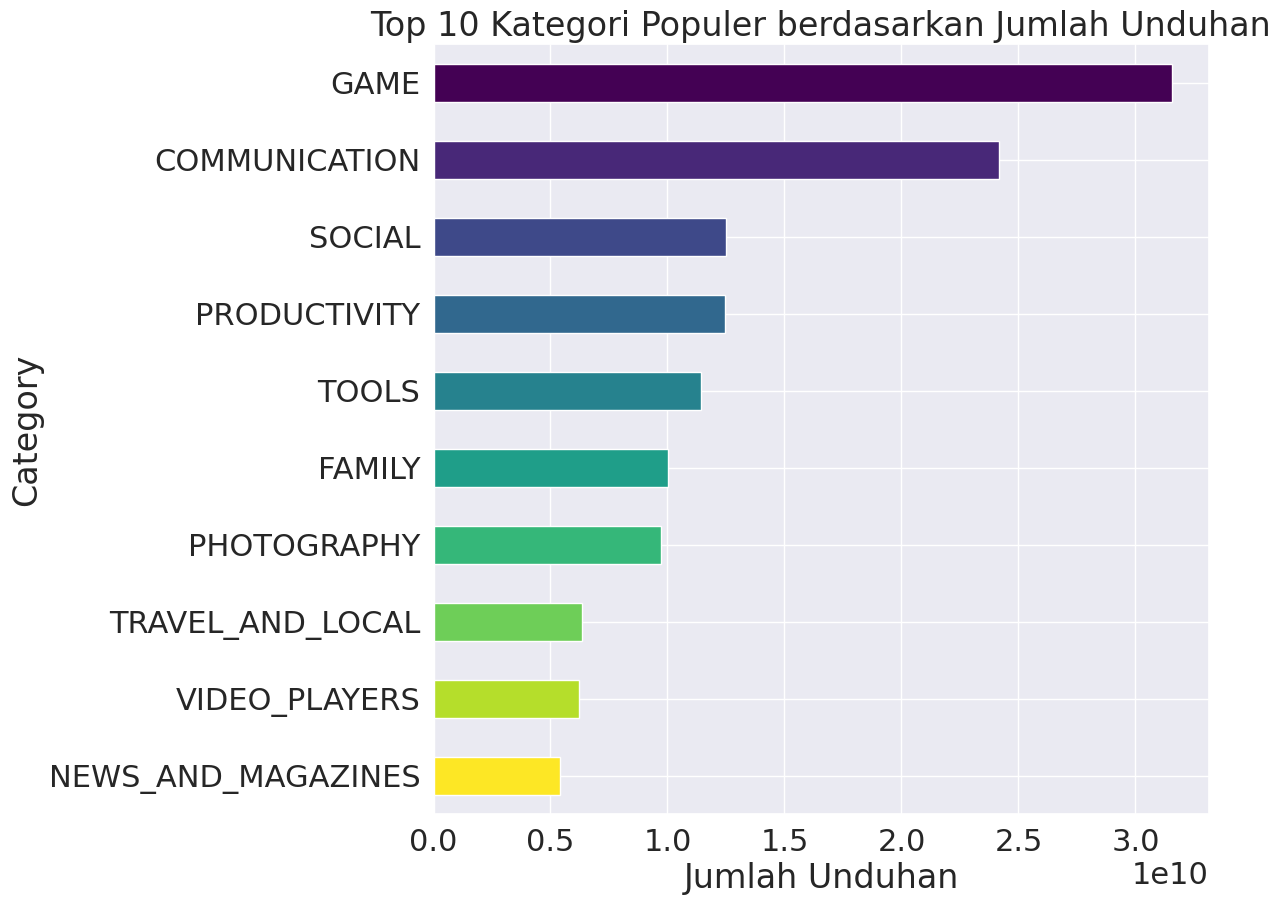

In [481]:
popular_categories = ps_data.groupby('Category')['Installs'].sum().sort_values(ascending=False)[:10]
colors = plt.cm.viridis(np.linspace(0, 1, len(popular_categories)))
popular_categories.plot.barh(figsize=(10, 10), color=colors)
plt.gca().invert_yaxis()
plt.xlabel('Jumlah Unduhan')
plt.title('Top 10 Kategori Populer berdasarkan Jumlah Unduhan')

Disini menunjukkan bahwa kategori aplikasi `Game`, `Communication` dan `Tools` memiliki jumlah penginstalan tertinggi (paling populer) dibandingkan dengan kategori aplikasi lainnya.

**6. Eksplorasi rata-rata rating aplikasi**

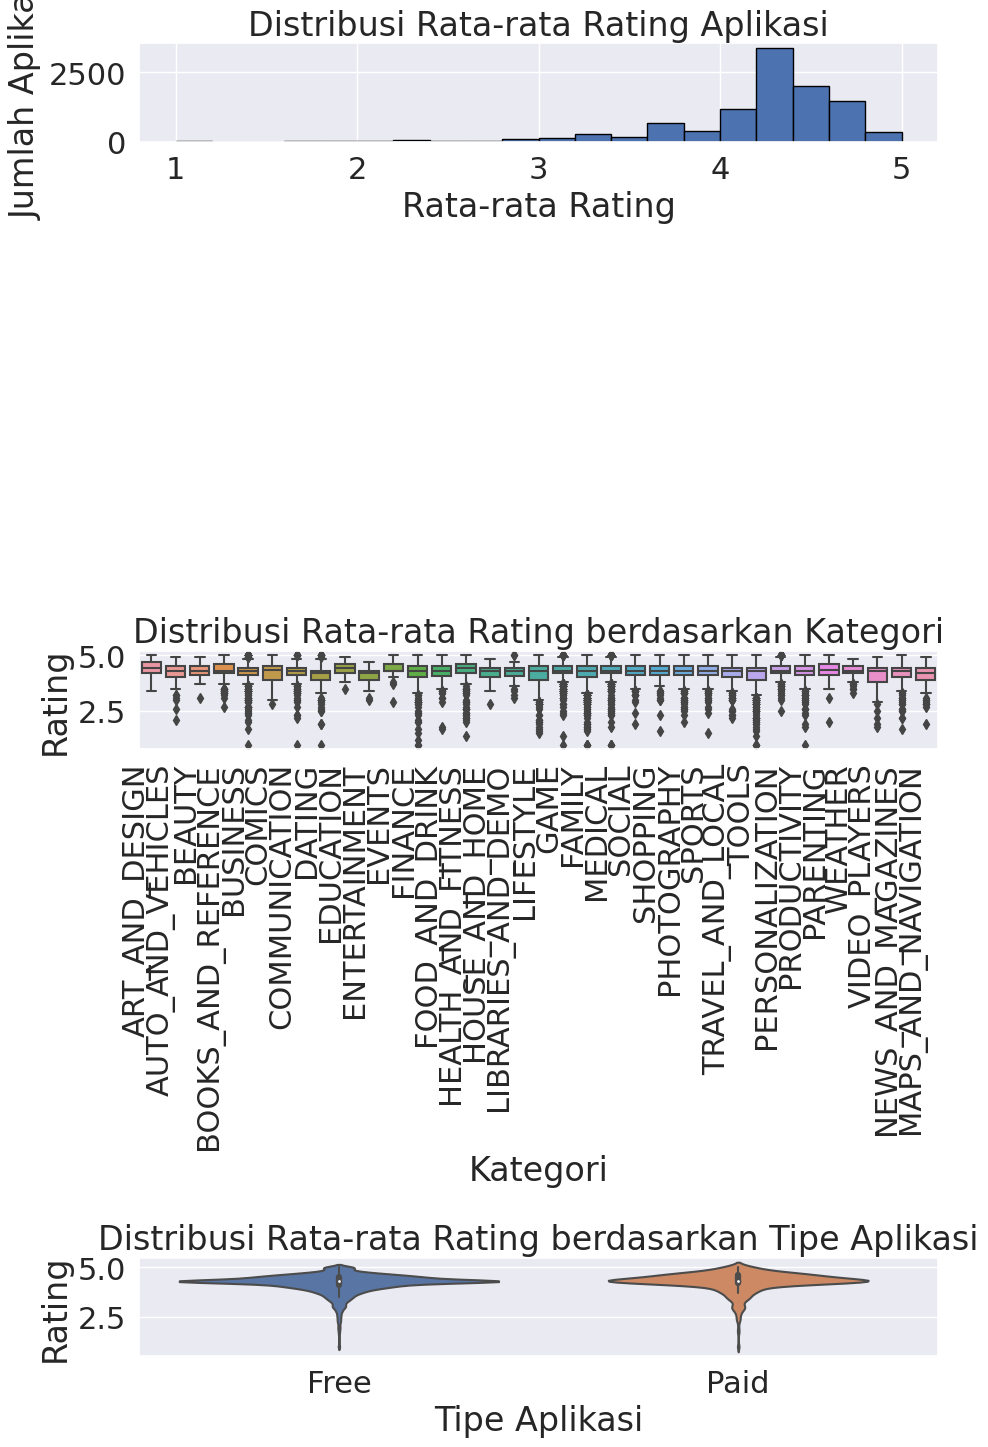

In [482]:
plt.figure(figsize=(10, 15))

# Plot 1 - Histogram: Distribusi rata-rata rating aplikasi
plt.subplot(3, 1, 1)
ps_data['Rating'].plot.hist(bins=20, edgecolor='black')
plt.xlabel('Rata-rata Rating')
plt.ylabel('Jumlah Aplikasi')
plt.title('Distribusi Rata-rata Rating Aplikasi')

# Plot 2 - Box Plot: Distribusi rata-rata rating berdasarkan kategori
plt.subplot(3, 1, 2)
sns.boxplot(data=ps_data, x='Category', y='Rating')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.title('Distribusi Rata-rata Rating berdasarkan Kategori')
plt.xticks(rotation=90, ha='right')

# Plot 3 - Violin Plot: Distribusi rata-rata rating berdasarkan tipe aplikasi
plt.subplot(3, 1, 3)
sns.violinplot(data=ps_data, x='Type', y='Rating')
plt.xlabel('Tipe Aplikasi')
plt.ylabel('Rating')
plt.title('Distribusi Rata-rata Rating berdasarkan Tipe Aplikasi')

plt.tight_layout()
plt.show()



**7. Representasi rata rata rating**

Kita dapat merepresentasikan rating dengan cara yang lebih baik jika kita mengelompokkan rating diantara interval tertentu. Di sini, kita coba mengelompokkan rating sebagai berikut:

* `4-5`: Rating tinggi
* `3-4`: Diatas rata-rata
* `2-3`: Rata-rata
* `1-2`: Dibawah rata-rata

Pertama buat dulu atribut baru dengan nama `Rating group` ke dataset.

In [483]:
def rata_rata_rating(val):
  if val>=4:
    return 'Rating tinggi'
  elif val>=3 and val<4:
    return 'Diatas rata-rata'
  elif val>=2 and val<3:
    return 'Rata-rata'
  else:
    return 'Dibawah rata-rata'

In [484]:
# Panggil fungsi
ps_data['Rating Group'] = ps_data['Rating'].apply(lambda x: rata_rata_rating(x))

**Visualisasi Rating Grup**

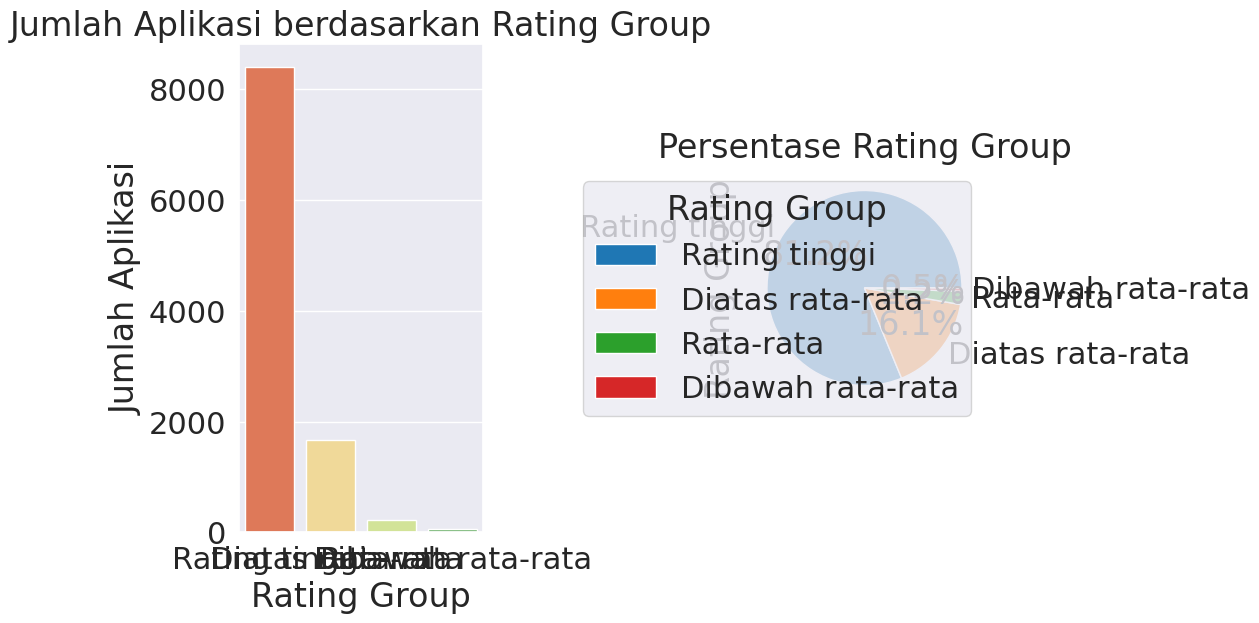

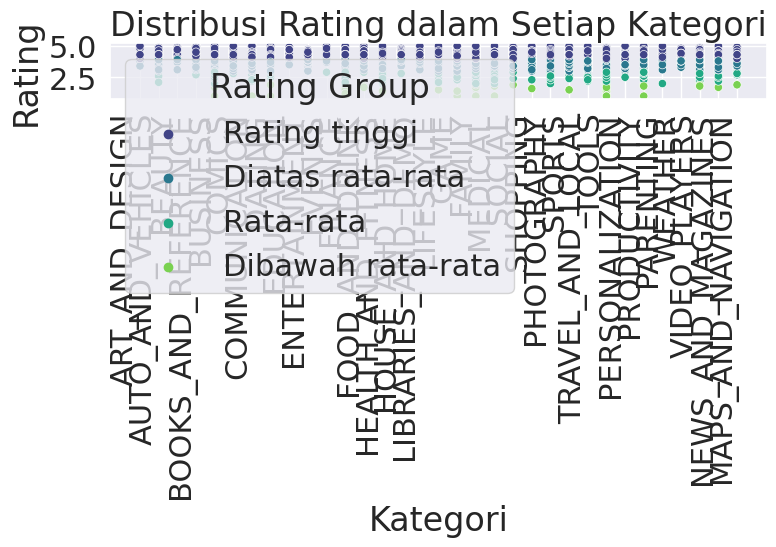

In [485]:
plt.figure(figsize=(12, 12))

# Plot 1 - Bar Plot: Jumlah Aplikasi berdasarkan Rating Group
plt.subplot(2, 2, 1)
sns.countplot(data=ps_data, x='Rating Group', palette='RdYlGn')
plt.xlabel('Rating Group')
plt.ylabel('Jumlah Aplikasi')
plt.title('Jumlah Aplikasi berdasarkan Rating Group')

# Plot 2 - Pie Chart: Persentase Rating Group
plt.subplot(2, 2, 2)
ps_data['Rating Group'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Persentase Rating Group')
plt.legend(title='Rating Group')
plt.tight_layout()

# Plot 2 - scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ps_data, x='Category', y='Rating', hue='Rating Group', palette='viridis')
plt.xlabel('Kategori')
plt.ylabel('Rating')
plt.title('Distribusi Rating dalam Setiap Kategori')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Rating Group')
plt.tight_layout()


plt.show()


**8. Distribusi Ukuran Aplikasi**

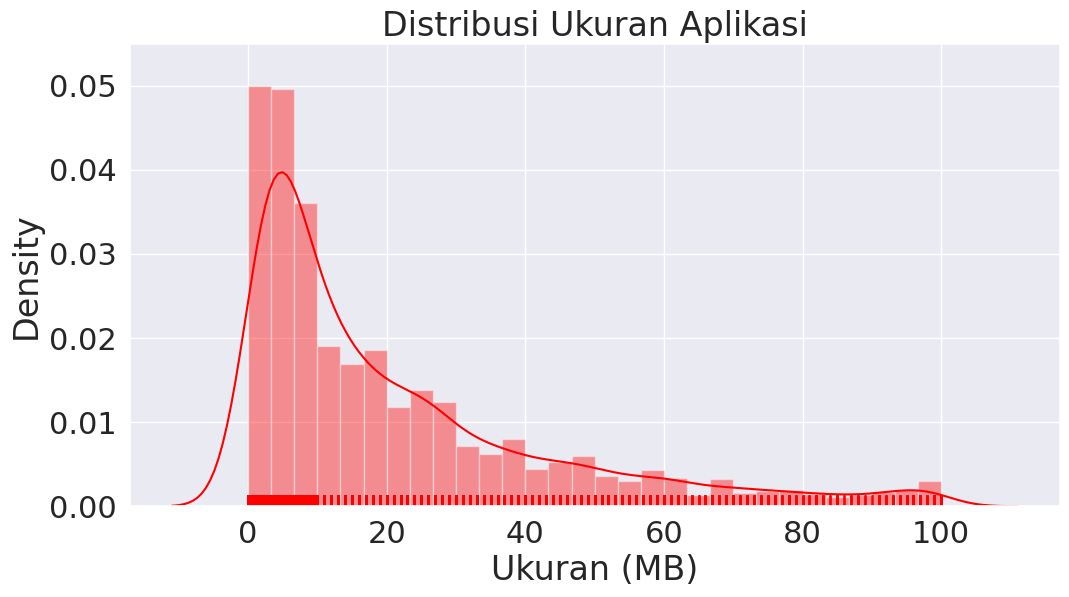

In [486]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Ukuran Aplikasi')
sns.distplot(ps_data['Size'],bins = 30,rug=True,color="Red")
plt.xlabel('Ukuran (MB)')
plt.show()

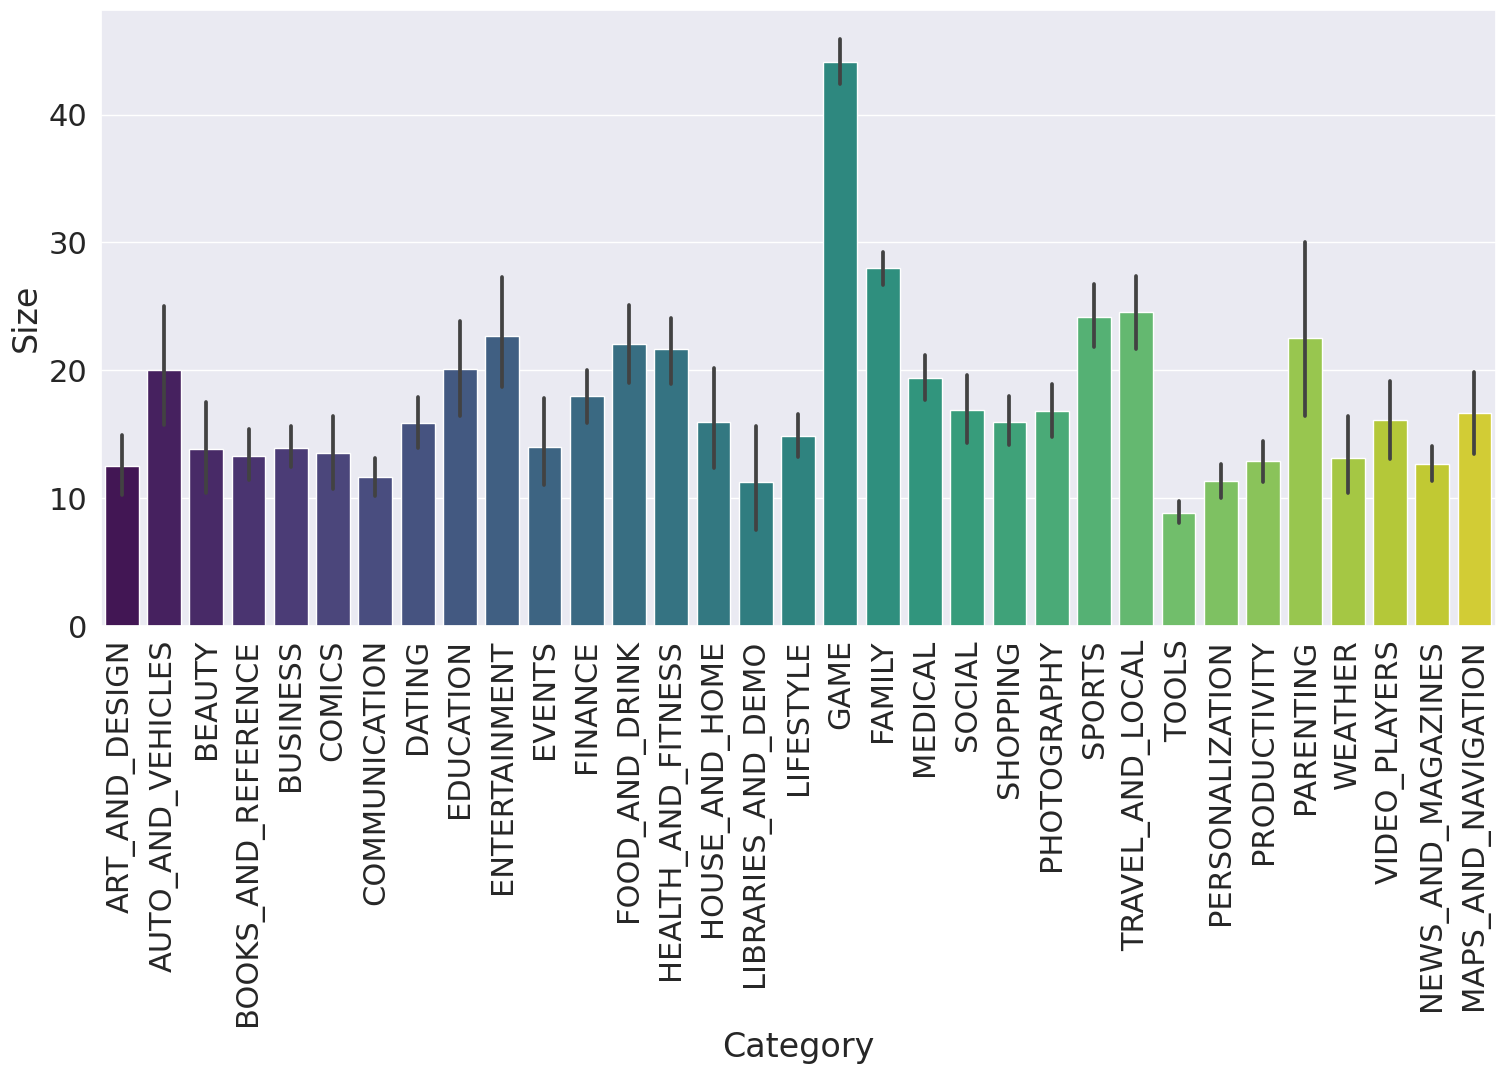

In [487]:
plt.subplots(figsize = (18,8))
plt.xticks(rotation = 90)
sns.barplot(data=ps_data, x='Category', y='Size', palette='viridis')
plt.show()

**9. Top 15 aplikasi dengan jumlah review dan unduhan terbanyak**

<Figure size 1000x800 with 0 Axes>

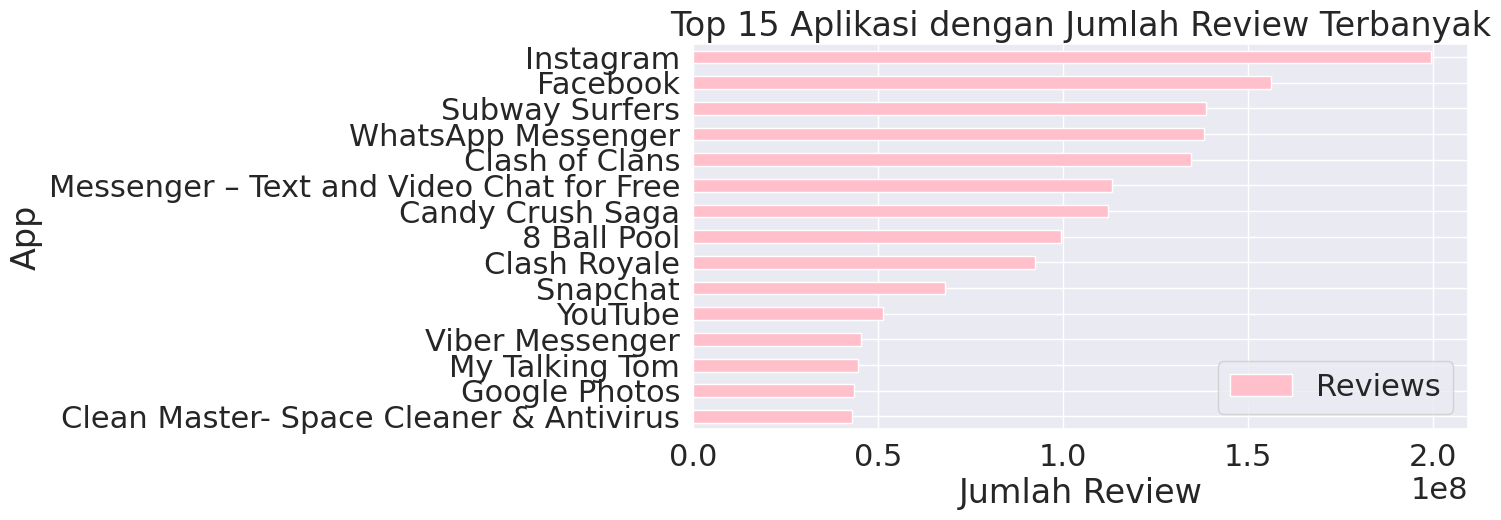

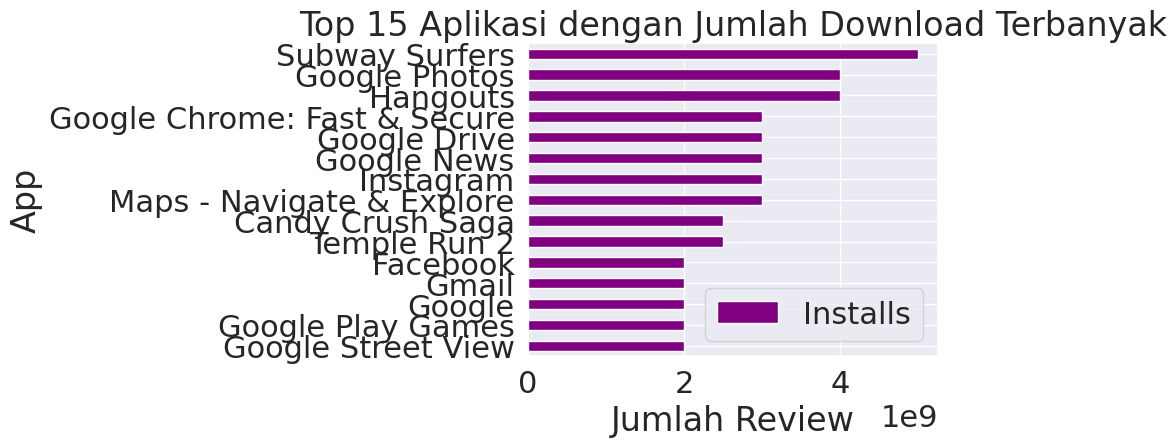

In [488]:
plt.figure(figsize=(10, 8))

# Top 15 App yang Paling Banyak Direiew
ps_data.groupby('App')[['Reviews','App']].sum().nlargest(15,['Reviews']).plot.barh(figsize = (10,5), color = 'pink').invert_yaxis()
plt.xlabel('Jumlah Review')
plt.title('Top 15 Aplikasi dengan Jumlah Review Terbanyak')

# Top 15 App yang Paling Banyak DiDownload
ps_data.groupby('App')[['Installs','App']].sum().nlargest(15,['Installs']).plot.barh(figsize = (10,5), color = 'purple').invert_yaxis()
plt.xlabel('Jumlah Review')
plt.title('Top 15 Aplikasi dengan Jumlah Download Terbanyak')

plt.tight_layout()
plt.show()

Bisa dikatakan bahwa aplikasi dengan jumlah download dan review pengguna terbanyak adalah aplikasi terpopuler di play store.

**10. Top 15 aplikasi berbayar paling mahal**

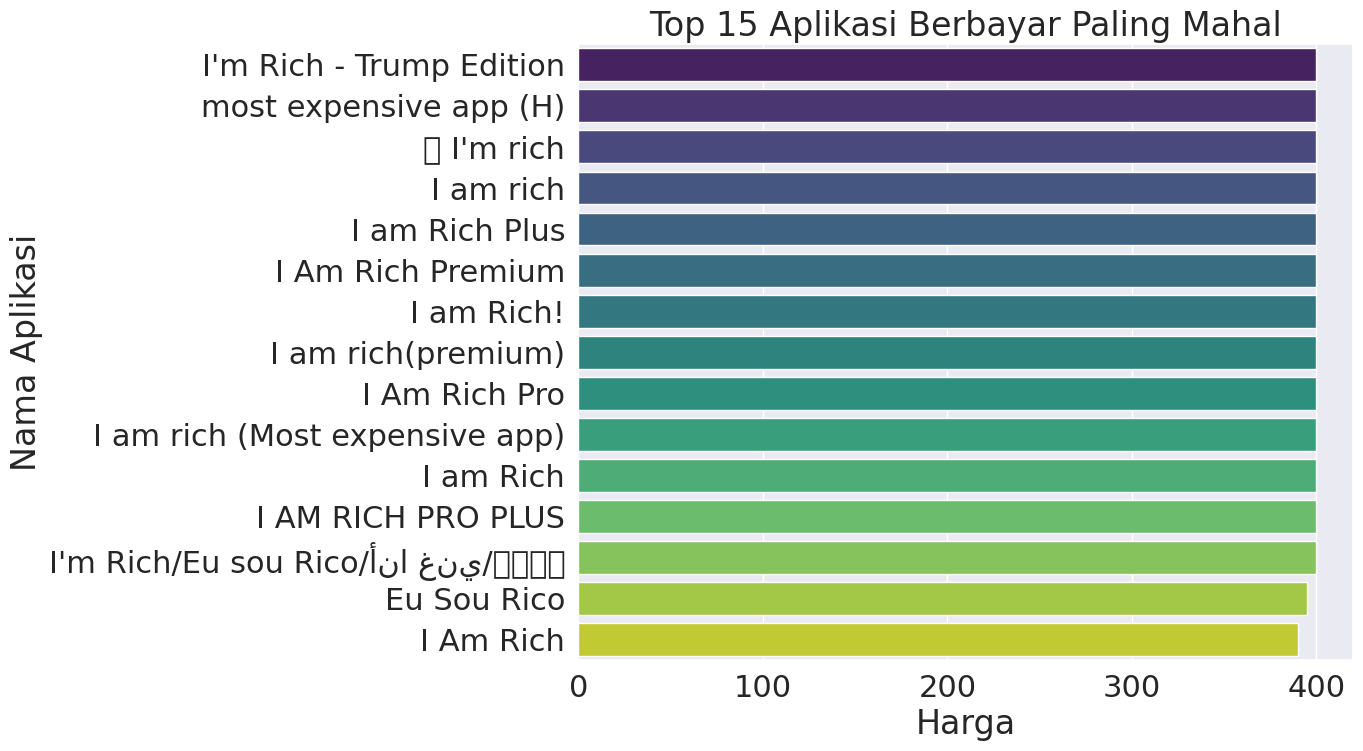

In [489]:
plt.figure(figsize=(10, 8))

# Mengurutkan berdasarkan harga dari yang paling mahal dan mengambil 15 teratas
top_15_expensive_apps = ps_data[ps_data['Type'] == 'Paid'].nlargest(15, 'Price')

sns.barplot(data=top_15_expensive_apps, x='Price', y='App', palette='viridis')
plt.xlabel('Harga')
plt.ylabel('Nama Aplikasi')
plt.title('Top 15 Aplikasi Berbayar Paling Mahal')

plt.show()


**11. Aplikasi dengan penghasilan terbanyak**

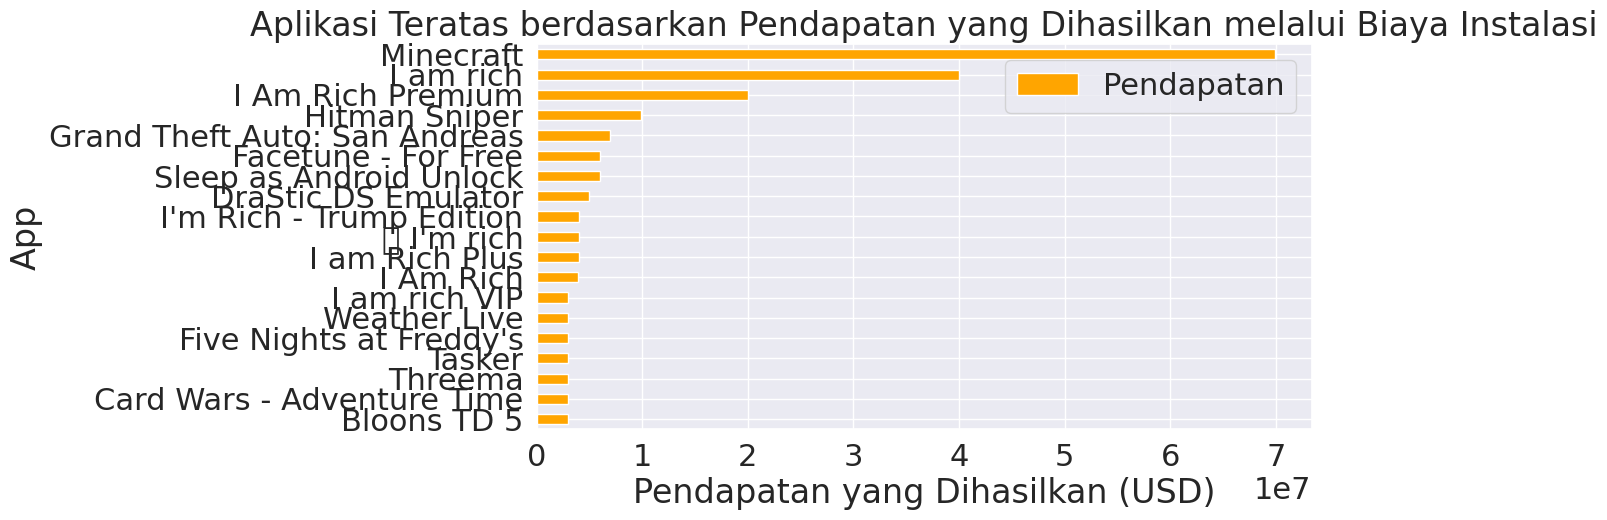

In [490]:
#Aplikasi berdasarkan Pendapatan yang Dihasilkan
app_berbayar = ps_data[ps_data['Type'] == 'Paid']
app_berbayar['Pendapatan'] = app_berbayar['Installs']*app_berbayar['Price']
total_pendapatan = app_berbayar.nlargest(20, 'Pendapatan')
total_pendapatan.groupby('App')['Pendapatan'].mean().sort_values().plot.barh(figsize=(10,5), color='orange')
plt.xlabel('Pendapatan yang Dihasilkan (USD)')
plt.title('Aplikasi Teratas berdasarkan Pendapatan yang Dihasilkan melalui Biaya Instalasi')
plt.legend()


Aplikasi dengan penghasilan paling banyak adalah game `Minecraft`.

**12. Pairwise Plot**

Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Price')

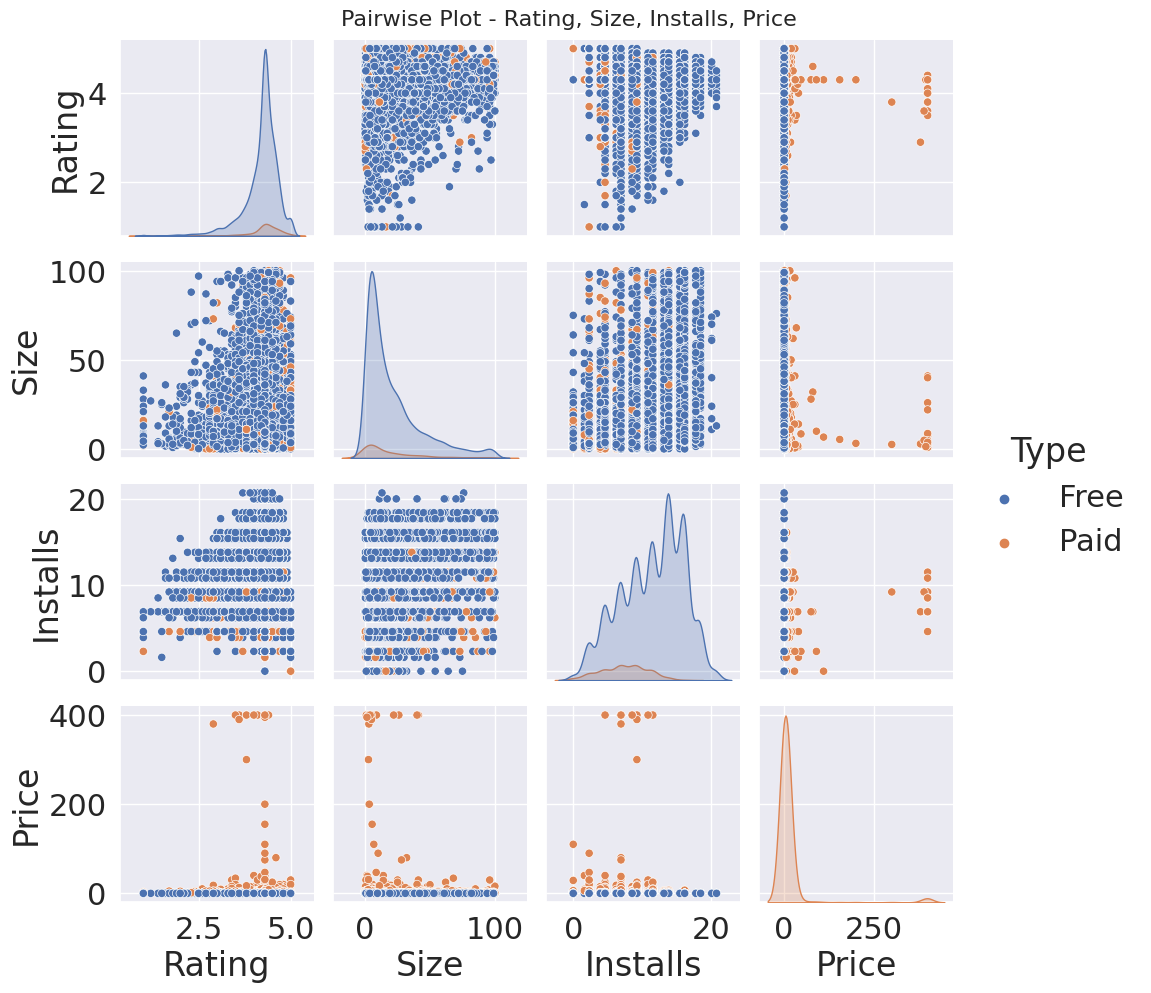

In [491]:
Rating = ps_data['Rating']
Size = ps_data['Size']
Installs = ps_data['Installs']
Type = ps_data['Type']
Price = ps_data['Price']

df_pairplot = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), Price, Type)),
                        columns=['Rating','Size', 'Installs', 'Price','Type']), hue='Type')
df_pairplot.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Price",x=0.5, y=1.0, fontsize=16)

#**Model 1: Prediksi Popularitas:**

**Logistic Regression**

In [492]:
from sklearn.metrics import confusion_matrix

In [493]:
def bucketInstalls(x):
    if x<=10000:
        return 'Rendah'
    elif (x>10000 and x<=1000000):
        return 'Sedang'
    elif (x>1000000):
        return 'Tinggi'

In [494]:
logistic_df=ps_data[['Installs','Reviews','Category','Content Rating','Type','Genres','Size']]
logistic_df=pd.get_dummies(logistic_df)
logistic_df['Installs']=logistic_df['Installs'].map(bucketInstalls)

In [495]:
len(logistic_df)

10346

In [496]:
logistic_df

,Installs,Reviews,Size,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Trivia;Education,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,Rendah,159,19.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sedang,967,14.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Tinggi,87510,8.7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Tinggi,215644,25.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sedang,967,2.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Rendah,38,53.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,Rendah,4,3.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,Rendah,3,9.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,Rendah,114,NaN,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
logistic_df = logistic_df.dropna(subset=['Size'])

In [498]:
X=logistic_df.drop('Installs',axis=1)
y=logistic_df['Installs'].values
y=y.astype('str')

In [499]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [500]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [501]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)
lr_percentage = lr_ac * 100


LogisticRegression_accuracy: 0.6572237960339944


**Logistic Regression Confusion Matrix**

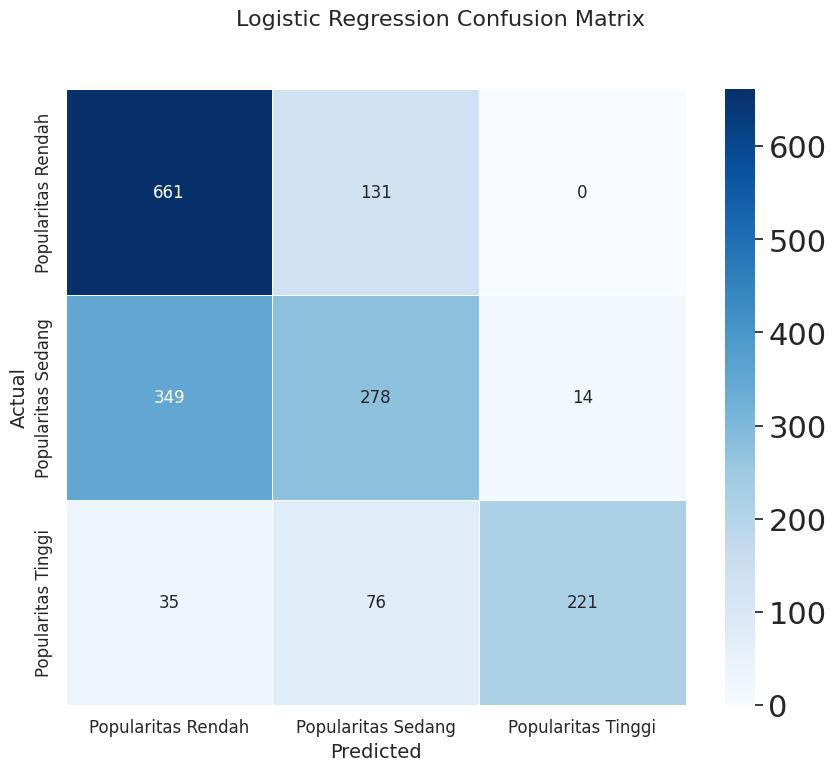

In [502]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
plt.suptitle('Logistic Regression Confusion Matrix', fontsize=16)

cmap = sns.color_palette("Blues", as_cmap=True)

# Convert lr_cm to a numerical array
lr_cm = np.array(lr_cm)

sns.heatmap(lr_cm, annot=True, cmap=cmap, fmt="d", linewidths=0.5, annot_kws={"fontsize": 12})

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

tick_labels = ["Popularitas Rendah", "Popularitas Sedang", "Popularitas Tinggi"]
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=tick_labels, fontsize=12)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=tick_labels, fontsize=12)

plt.show()


**Prediksi Popularitas menggunakan Random Forest**

In [503]:
from sklearn.ensemble import RandomForestClassifier

In [504]:
random_df=logistic_df

In [505]:
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [506]:
rdf_ac

0.8861189801699717

Random Forest Confusion Matrix

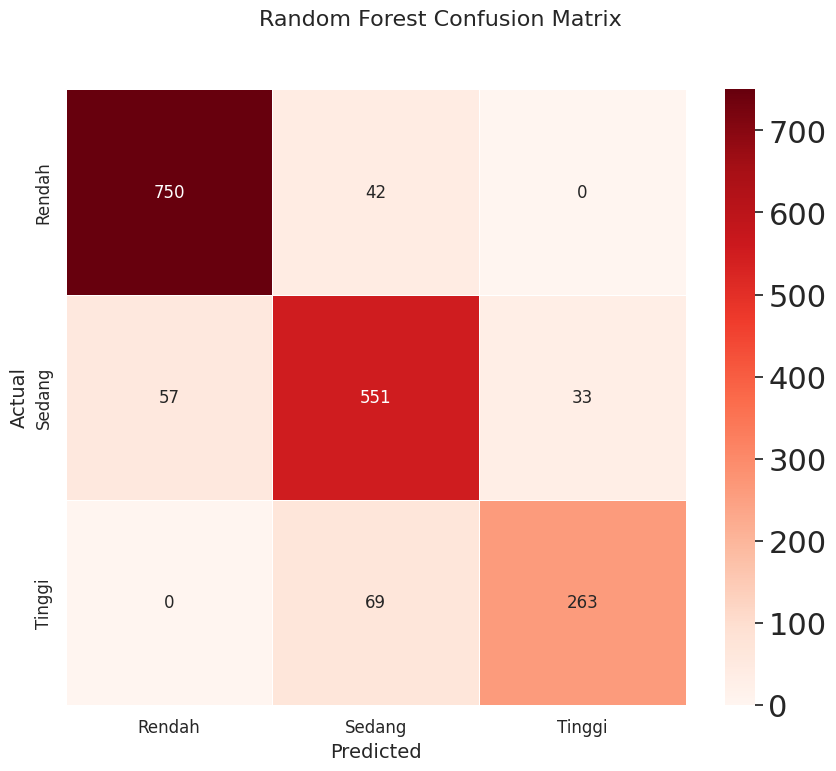

In [507]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
plt.suptitle('Random Forest Confusion Matrix', fontsize=16)

cmap = sns.color_palette("Reds", as_cmap=True)

sns.heatmap(rdf_cm, annot=True, cmap=cmap, fmt="d", linewidths=0.5, annot_kws={"fontsize": 12})

plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

tick_labels = ["Rendah", "Sedang", "Tinggi"]
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=tick_labels, fontsize=12)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=tick_labels, fontsize=12)

plt.show()

#**Model 2: Prediksi Rating:**

Prediksi Rating menggunakan Linear Regression

In [508]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [509]:
ps_data.drop(["App", "Last Updated", "Type", "Content Rating"], axis=1, inplace=True)

In [510]:
ps_data.dropna(inplace=True)

In [511]:
ps_data_ = ps_data[["Category", "Genres", "Android Ver"]]

In [512]:
ps_data.drop(["Category", "Genres", "Current Ver", "Android Ver", "Rating Group"], axis=1, inplace=True)

In [513]:
ps_data_ = pd.get_dummies(ps_data_, drop_first=True)

In [514]:
ps_data = pd.concat([ps_data, ps_data_], axis = 1)

In [515]:
ps_data.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Android Ver_5.0 - 7.1.1,Android Ver_5.0 - 8.0,Android Ver_5.0 and up,Android Ver_5.1 and up,Android Ver_6.0 and up,Android Ver_7.0 - 7.1.1,Android Ver_7.0 and up,Android Ver_7.1 and up,Android Ver_8.0 and up,Android Ver_Varies with device
0,4.1,159,19.0,10000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.0,500000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7,5000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25.0,50000000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8,100000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [516]:
X = ps_data.drop("Rating", axis = 1)
y = ps_data["Rating"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 42)

In [517]:
Model = linreg.fit(X_train, y_train)
predicted_rating = linreg.predict(X_test)

y_test = np.array(y_test)
predicted_rating = np.array(predicted_rating)

Predicted_Actual = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predicted_rating.flatten()})
Predicted_Actual.head()


,Actual,Predicted
0,4.3,4.227396
1,4.4,4.052505
2,3.5,4.138087
3,4.3,4.060332
4,4.1,4.101379


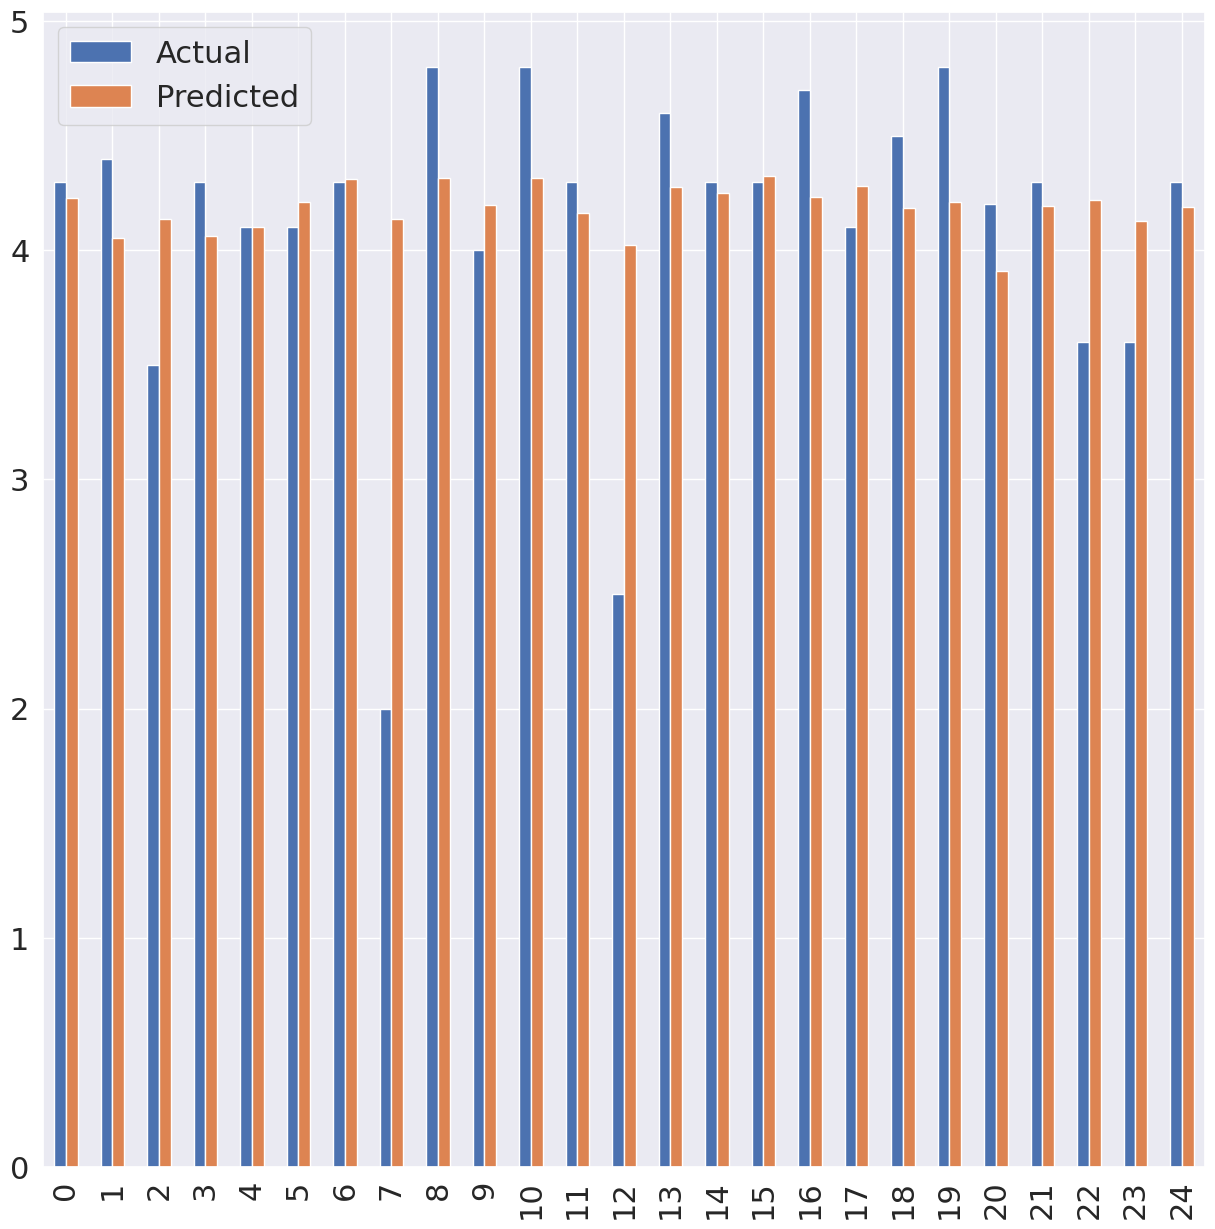

In [518]:
figure = Predicted_Actual.head(25)
figure.plot(kind = 'bar', figsize = (15,15))
plt.show()

In [519]:
print('Root Mean Squared Error : ', np.round(100*np.sqrt(ms(y_test, predicted_rating)), 4))
print('Prediction Error percent: ',round((0.50/np.mean(y_test))*100))

Root Mean Squared Error :  49.1722
Prediction Error percent:  12


#**Kesimpulan:**

* **~92.6%** aplikasi di play store gratis. Dan berbayar atau tidaknya aplikasi ternyata tidak terlalu mempengaruhi rating.
* Rata-rata aplikasi di play store bisa digunakan semua orang tanpa batasan usia **(81.8%)**
* Kategori **Family, Game,** dan **Tools** memiliki jumlah aplikasi terbanyak dibandingkan dengan kategori lainnya.
* kategori **Game, Communication** dan Tools memiliki jumlah penginstalan tertinggi (paling populer) dibandingkan dengan kategori aplikasi lainnya.
* Rata rata rating di play store adalah **4.2.**
* Persentasi aplikasi dengan Rating tinggi adalah **~76%**
* Aplikasi paling populer dengan jumlah review paling tinggi adalah aplikasi sosial media seperti **instagram** dan **facebook**
* **Minecraft** adalah aplikasi dengan revenue pendapatan paling tinggi di play store.
